In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm

In [2]:
ship2 = pd.read_csv("/content/drive/MyDrive/SCM-Cold Chain Data set/Shipment 2.csv")

In [3]:
ship2.isnull().sum()

t                0
Front_Top        0
Front_Middle     0
Front_Bottom     0
Middle_Top       0
Middle_Middle    0
Middle_Bottom    0
Rear_Top         0
Rear_Middle      0
Rear_Bottom      0
dtype: int64

In [4]:
len(ship2)

72

In [5]:
ship2.head()

,t,Front_Top,Front_Middle,Front_Bottom,Middle_Top,Middle_Middle,Middle_Bottom,Rear_Top,Rear_Middle,Rear_Bottom
0,1,33.3,33.6,33.3,34.2,34.2,33.6,32.7,33.8,34.9
1,2,34.0,34.2,34.3,34.3,34.7,34.2,33.4,34.7,35.6
2,3,34.2,34.3,34.2,34.3,34.7,34.3,34.2,34.9,35.6
3,4,34.2,34.3,34.3,34.5,34.5,34.3,34.3,35.1,35.6
4,5,34.5,34.5,34.5,34.7,34.9,34.5,34.7,35.4,36.0


In [6]:
columns_ship2 = list(ship2.columns)
columns_ship2.remove("t")
columns_ship2

['Front_Top',
 'Front_Middle',
 'Front_Bottom',
 'Middle_Top',
 'Middle_Middle',
 'Middle_Bottom',
 'Rear_Top',
 'Rear_Middle',
 'Rear_Bottom']

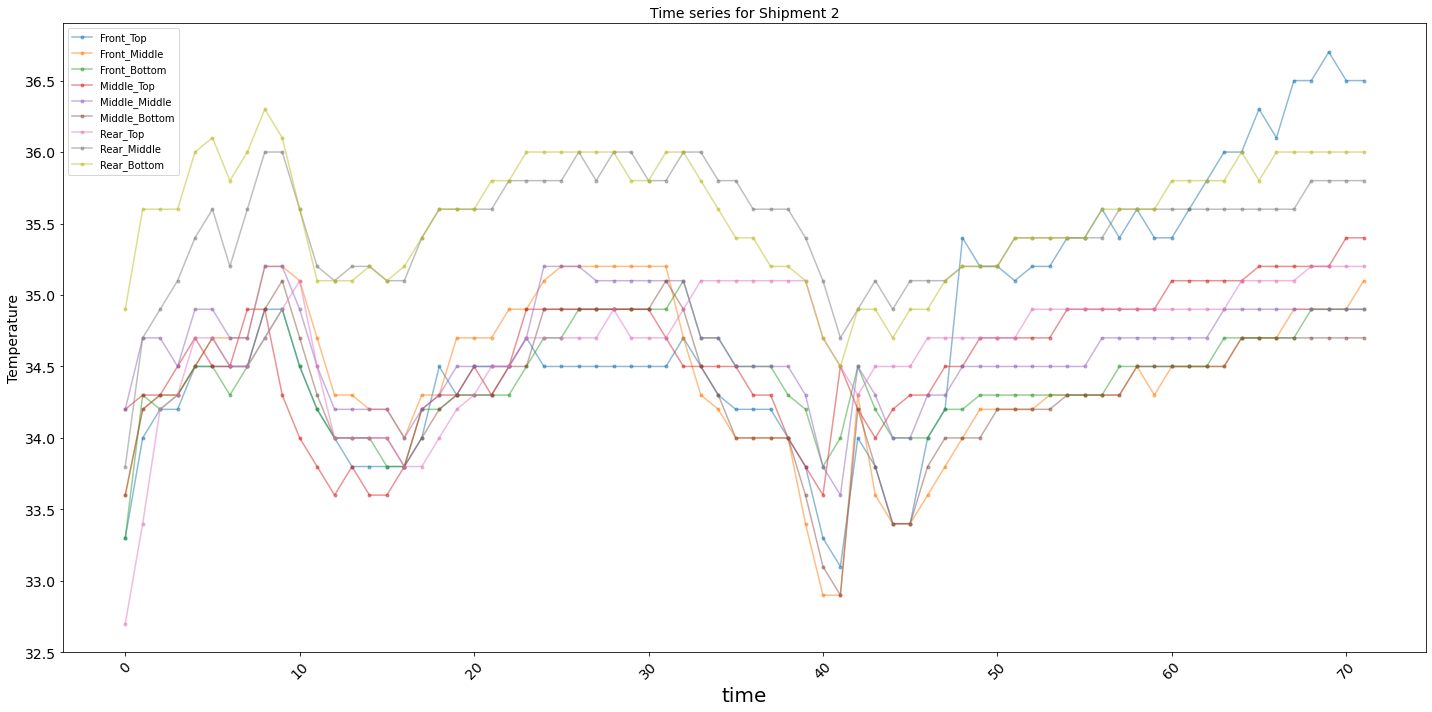

In [7]:
plt.figure(figsize=(20,10))
for index in columns_ship2:

  plt.plot(ship2.index, ship2[index], '.-', label= index, alpha=0.5)

plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 2', fontsize=14)
plt.legend(columns_ship2)
plt.tight_layout()

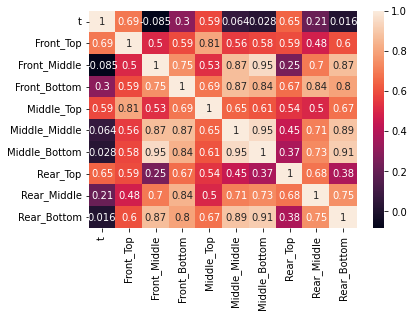

In [8]:
sns.heatmap(ship2.corr(), annot = True)

In [9]:
ship2_average = ship2
ship2_average = ship2_average.drop('t', axis=1)
ship2_average["Average"] = ship2_average.mean(axis=1)
ship2_average.head()

,Front_Top,Front_Middle,Front_Bottom,Middle_Top,Middle_Middle,Middle_Bottom,Rear_Top,Rear_Middle,Rear_Bottom,Average
0,33.3,33.6,33.3,34.2,34.2,33.6,32.7,33.8,34.9,33.733333
1,34.0,34.2,34.3,34.3,34.7,34.2,33.4,34.7,35.6,34.377778
2,34.2,34.3,34.2,34.3,34.7,34.3,34.2,34.9,35.6,34.522222
3,34.2,34.3,34.3,34.5,34.5,34.3,34.3,35.1,35.6,34.566667
4,34.5,34.5,34.5,34.7,34.9,34.5,34.7,35.4,36.0,34.855556


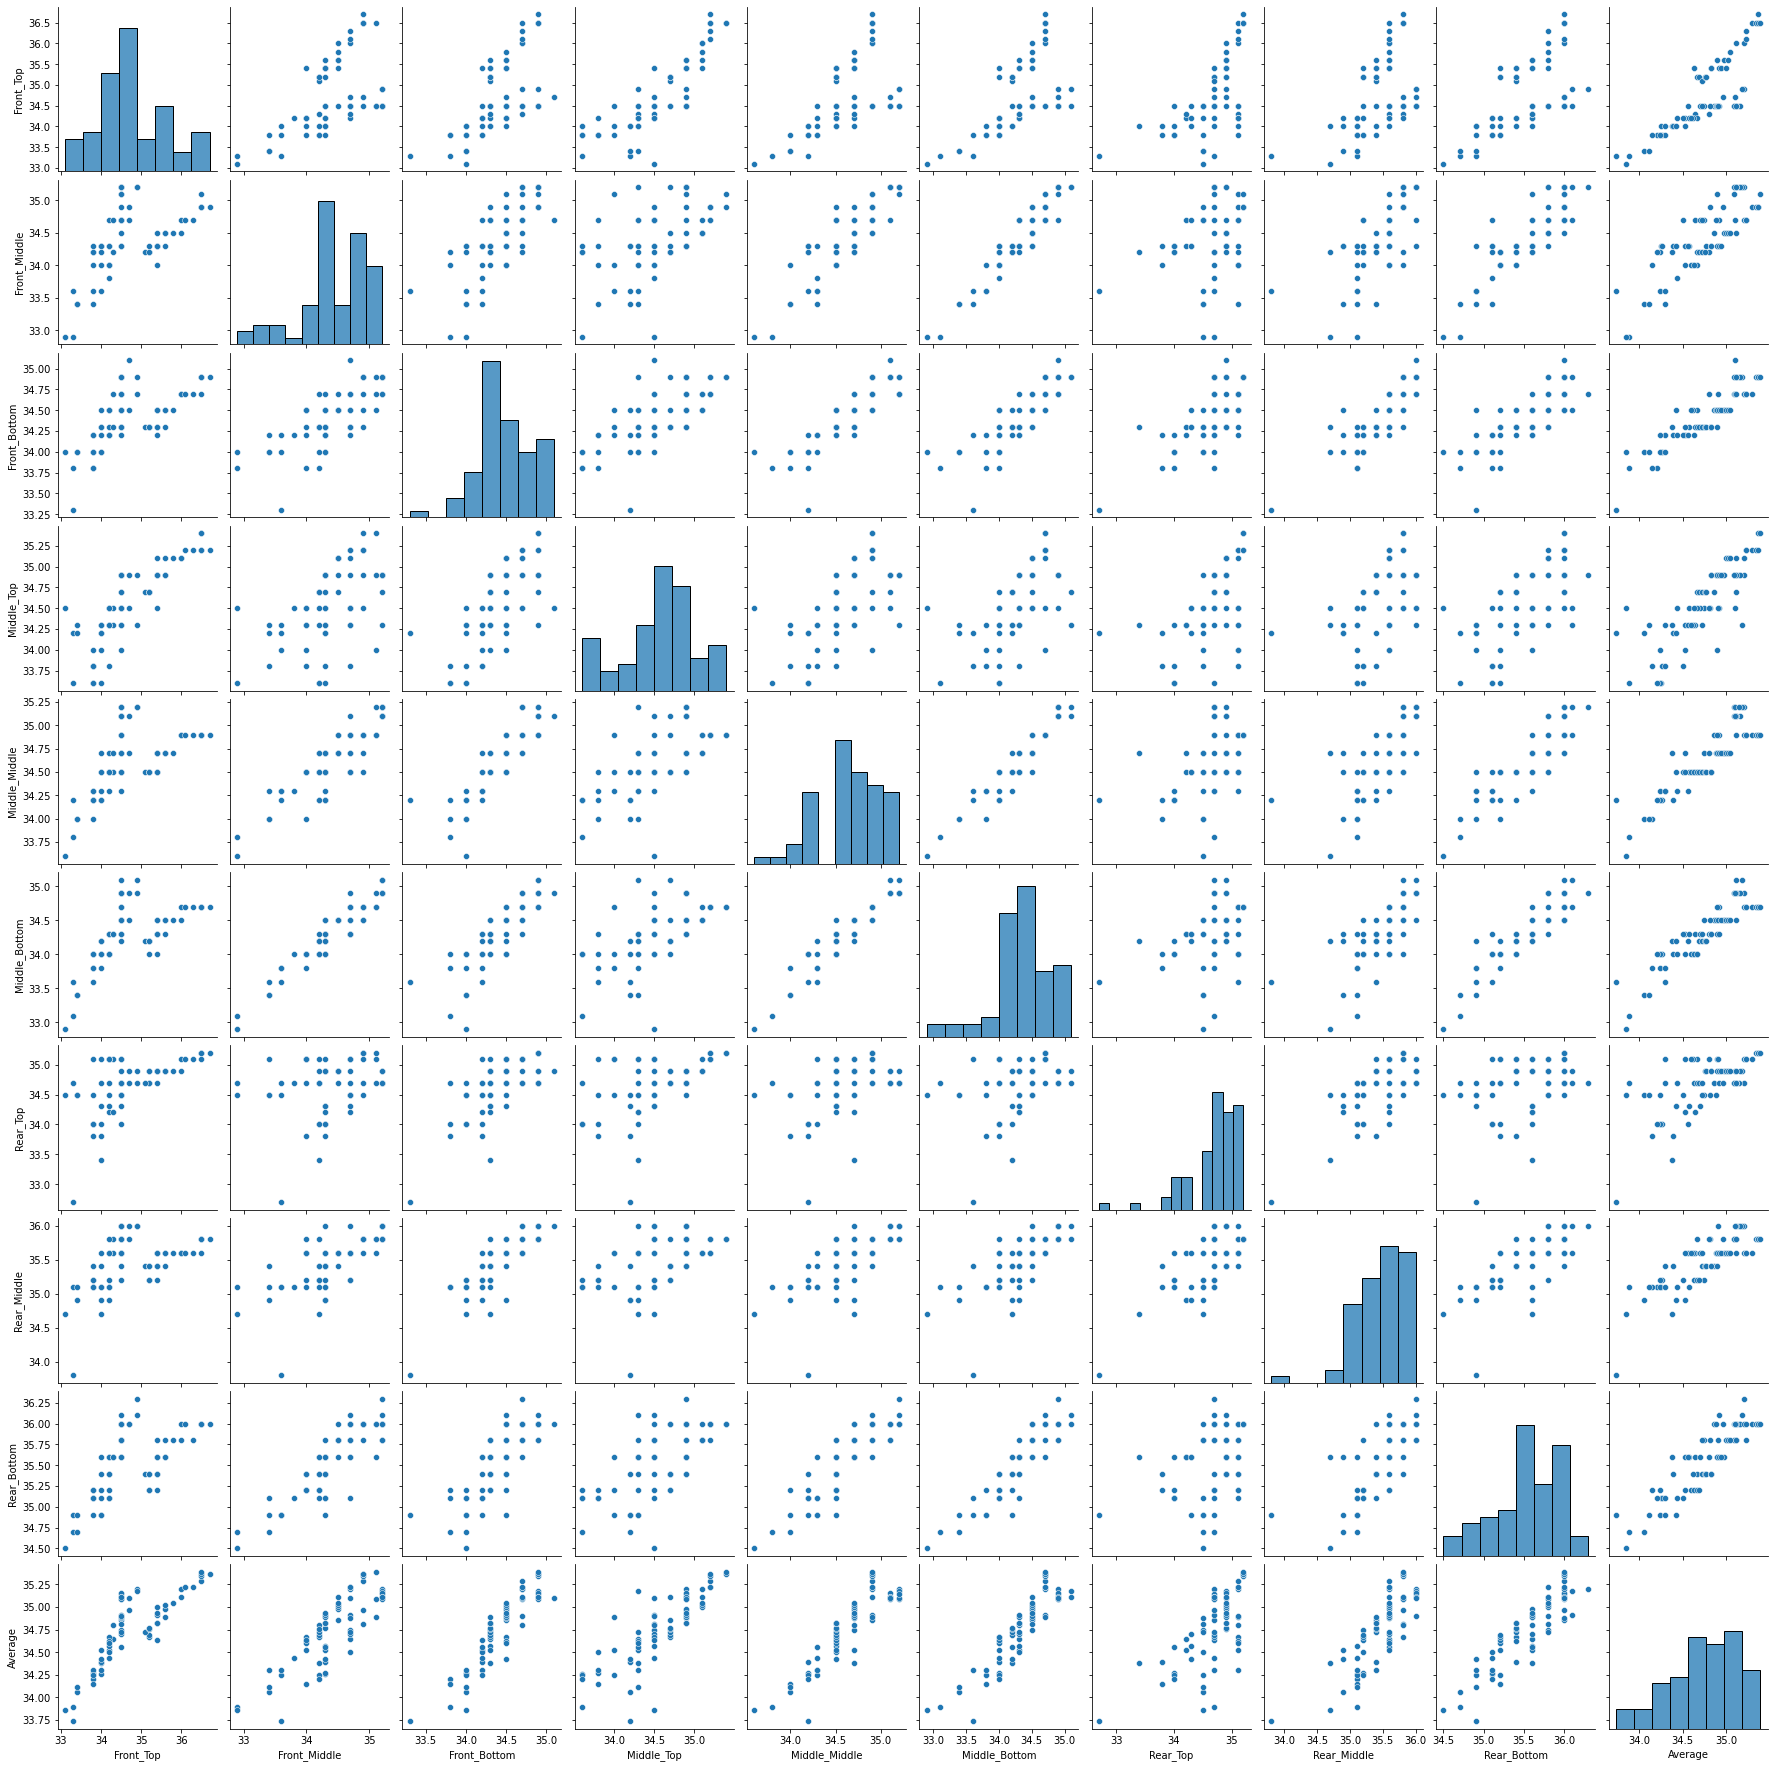

In [39]:
sns.pairplot(ship2_average)

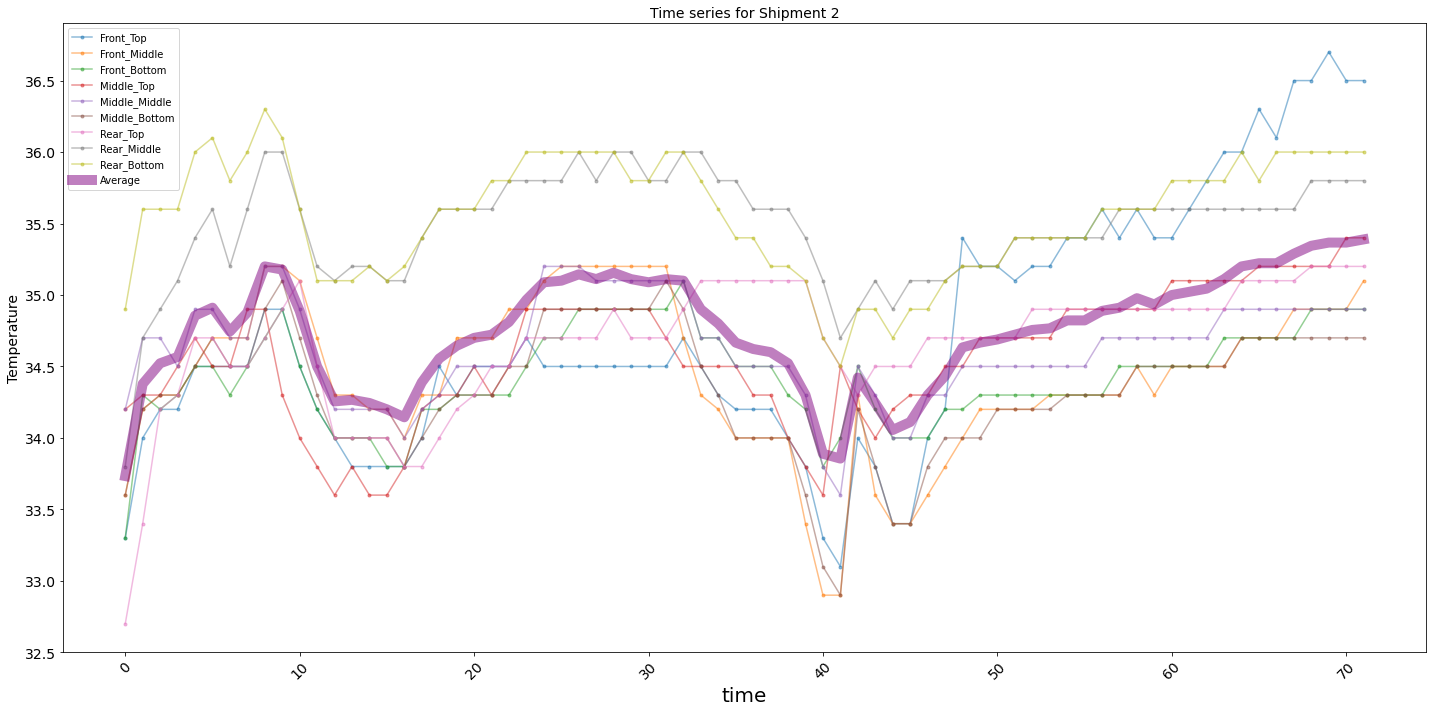

In [10]:
plt.figure(figsize=(20,10))
for index in columns_ship2:

  plt.plot(ship2.index, ship2[index], '.-', label= index, alpha=0.5)
plt.plot(ship2_average.index, ship2_average["Average"], label= "Average", alpha=0.5, color='purple', linewidth=10)
plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 2', fontsize=14)
plt.legend()
plt.tight_layout()

In [11]:
features = list(ship2_average.columns)
features

['Front_Top',
 'Front_Middle',
 'Front_Bottom',
 'Middle_Top',
 'Middle_Middle',
 'Middle_Bottom',
 'Rear_Top',
 'Rear_Middle',
 'Rear_Bottom',
 'Average']

In [12]:
from sklearn.model_selection import train_test_split
X = ship2["t"]
y = ship2_average["Average"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

**Linear Regression for shipment 2 temperature**

---



---



In [14]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()


In [15]:
sklearn_lin_reg0 = LinearRegression()
sklearn_lin_reg0.fit(X_train_reshaped, y_train)

LinearRegression()

In [16]:
y_pred1 = sklearn_lin_reg0.predict(X_test_reshaped)

In [17]:
x = sm.add_constant(X)
Linear_model = sm.OLS(y, X).fit()
print("AIC metrics for Linear Regression")
print(Linear_model.aic)
print("BIC metrics for Linear Regression")
print(Linear_model.bic)

AIC metrics for Linear Regression
614.9087988571907
BIC metrics for Linear Regression
617.1854649762067


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
from sklearn import metrics
print("Linear Regression metrics")

print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_pred1))
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_pred1))
print('Squared Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R2 Score : ',metrics.r2_score(y_test, y_pred1))

Linear Regression metrics
Mean Absolute error :  0.30578908101139185
Mean Squared error :  0.14935027520276145
Squared Mean Squared error :  0.3864586332361608
R2 Score :  0.19326948264068533


In [19]:
df_plot1 = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_pred1}, index=y_test.index)

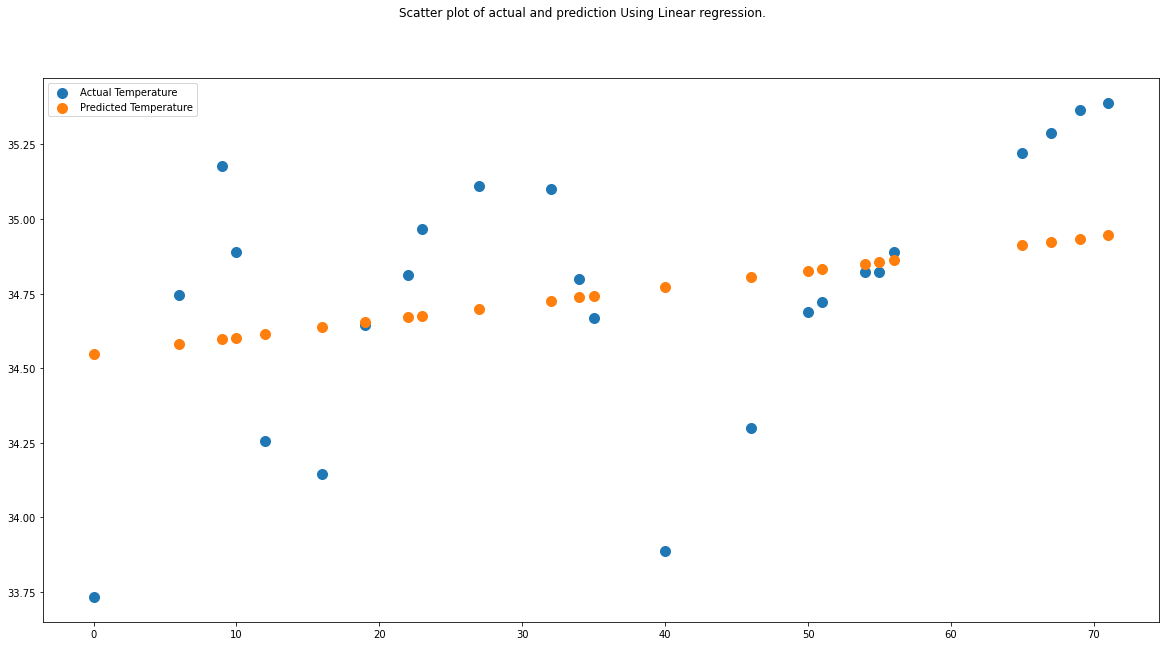

In [20]:
fig, axe = plt.subplots(figsize=(20,10))
fig.suptitle("Scatter plot of actual and prediction Using Linear regression.")
axe.scatter(x=df_plot1.index.to_list(), y=df_plot1['y_test'], label='Actual Temperature', s = 100)
axe.scatter(x=df_plot1.index.to_list(), y=df_plot1['y_pred'], label='Predicted Temperature', s = 100)
axe.legend()
plt.show()

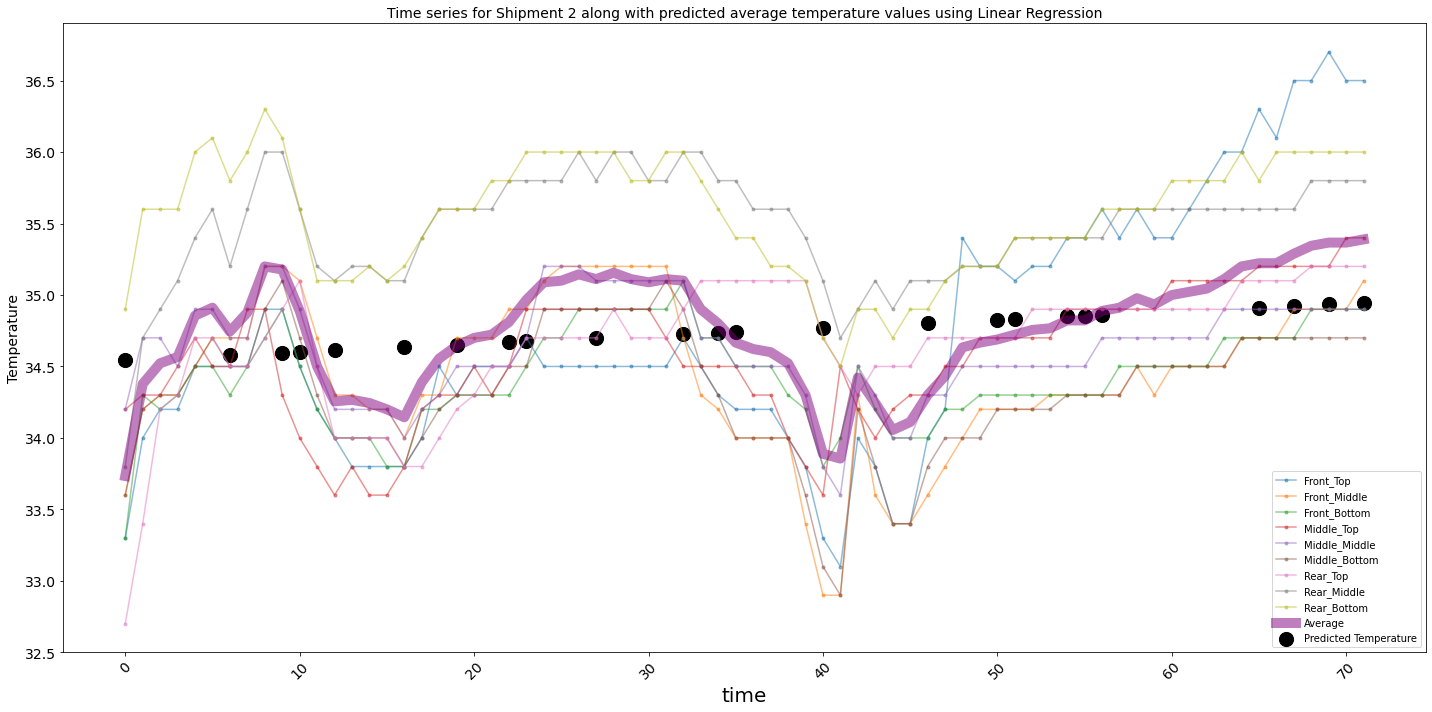

In [21]:
plt.figure(figsize=(20,10))
for index in columns_ship2:

  plt.plot(ship2.index, ship2[index], '.-', label= index, alpha=0.5)
plt.plot(ship2_average.index, ship2_average["Average"], label= "Average", alpha=0.5, color='purple', linewidth=10)
plt.scatter(x=df_plot1.index.to_list(), y=df_plot1['y_pred'], label='Predicted Temperature', s = 200, color = 'black')
plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 2 along with predicted average temperature values using Linear Regression', fontsize=14)
plt.legend()
plt.tight_layout()

**Random Forrest Regressor**


---



---



In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1, random_state = 0)
model =regressor.fit(X_train_reshaped, y_train)
# print(model.aic)

In [23]:
y_pred = regressor.predict(X_test_reshaped)

In [24]:
from sklearn import metrics
print("Random Forest Metrics")
print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_pred))
print('Squared Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score : ',metrics.r2_score(y_test, y_pred))

Random Forest Metrics
Mean Absolute error :  0.1342592592592604
Mean Squared error :  0.045874485596707974
Squared Mean Squared error :  0.21418329906112654
R2 Score :  0.7522043568464722


In [25]:
df_plot = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_pred}, index=y_test.index)

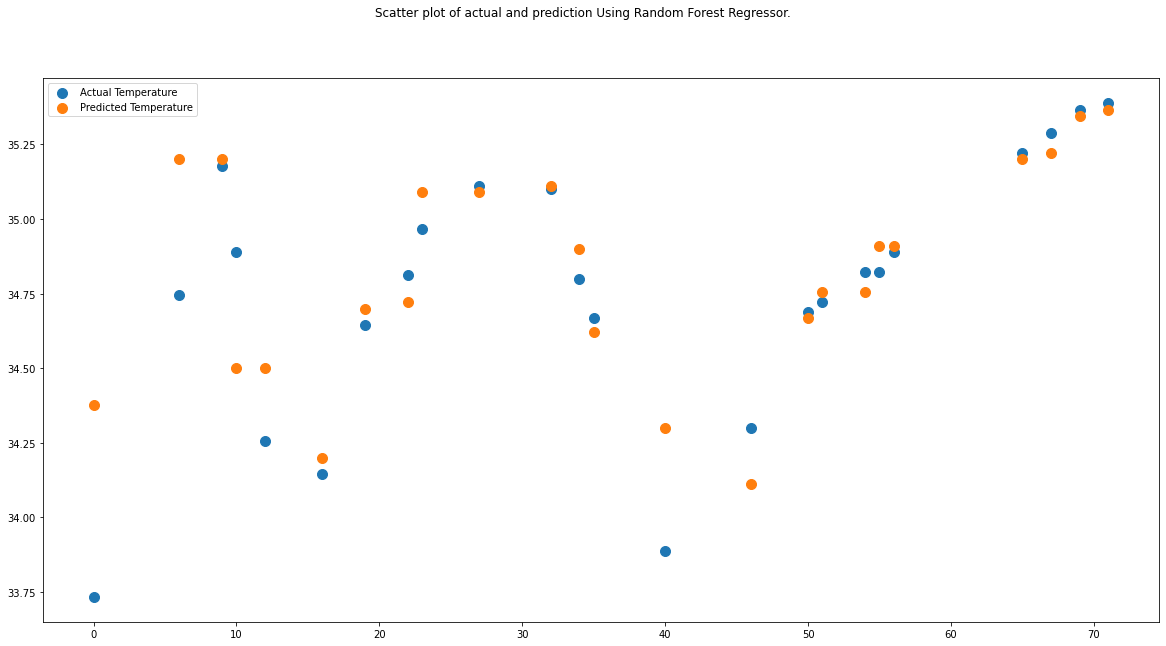

In [26]:
fig, axe = plt.subplots(figsize=(20,10))
fig.suptitle("Scatter plot of actual and prediction Using Random Forest Regressor.")
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_test'], label='Actual Temperature', s = 100)
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_pred'], label='Predicted Temperature', s = 100)
axe.legend()
plt.show()

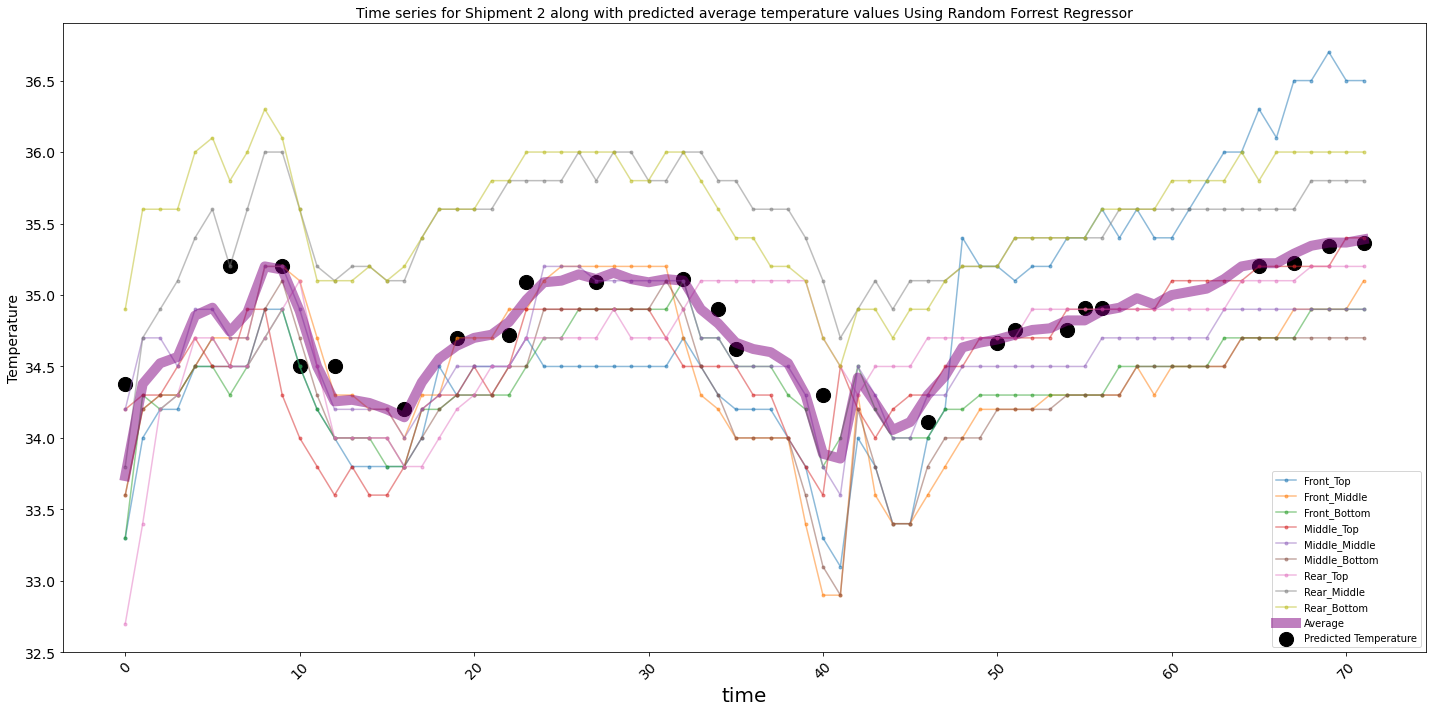

In [27]:
plt.figure(figsize=(20,10))
for index in columns_ship2:

  plt.plot(ship2.index, ship2[index], '.-', label= index, alpha=0.5)
plt.plot(ship2_average.index, ship2_average["Average"], label= "Average", alpha=0.5, color='purple', linewidth=10)
plt.scatter(x=df_plot.index.to_list(), y=df_plot['y_pred'], label='Predicted Temperature', s = 200, color = 'black')
plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 2 along with predicted average temperature values Using Random Forrest Regressor', fontsize=14)
plt.legend()
plt.tight_layout()

**Decision Tree Regression with AdaBoost**:

---



---






In [28]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

In [29]:
model1 = regr_1.fit(X_train_reshaped, y_train)
model2 = regr_2.fit(X_train_reshaped, y_train)

In [30]:
y_1 = regr_1.predict(X_test_reshaped)
y_2 = regr_2.predict(X_test_reshaped)

In [31]:
from sklearn import metrics
print("Metrics of decesion Tree Regressor")
print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_1))
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_1))
print('Squared Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_1)))
print('R2 Score : ',metrics.r2_score(y_test, y_1))

Metrics of decesion Tree Regressor
Mean Absolute error :  0.17594246031746005
Mean Squared error :  0.08117319381456262
Squared Mean Squared error :  0.2849090974584045
R2 Score :  0.5615348377977463


In [32]:
from sklearn import metrics
print("Metrics of Adaboost Regressor")
print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_2))
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_2)))
print('R2 Score : ',metrics.r2_score(y_test, y_1))

Metrics of Adaboost Regressor
Mean Absolute error :  0.12195996840094026
Mean Squared error :  0.04176756339758967
Root Mean Squared error :  0.2043711413032419
R2 Score :  0.5615348377977463


In [33]:
df_plot2 = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_1}, index=y_test.index)
df_plot3 = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_2}, index=y_test.index)

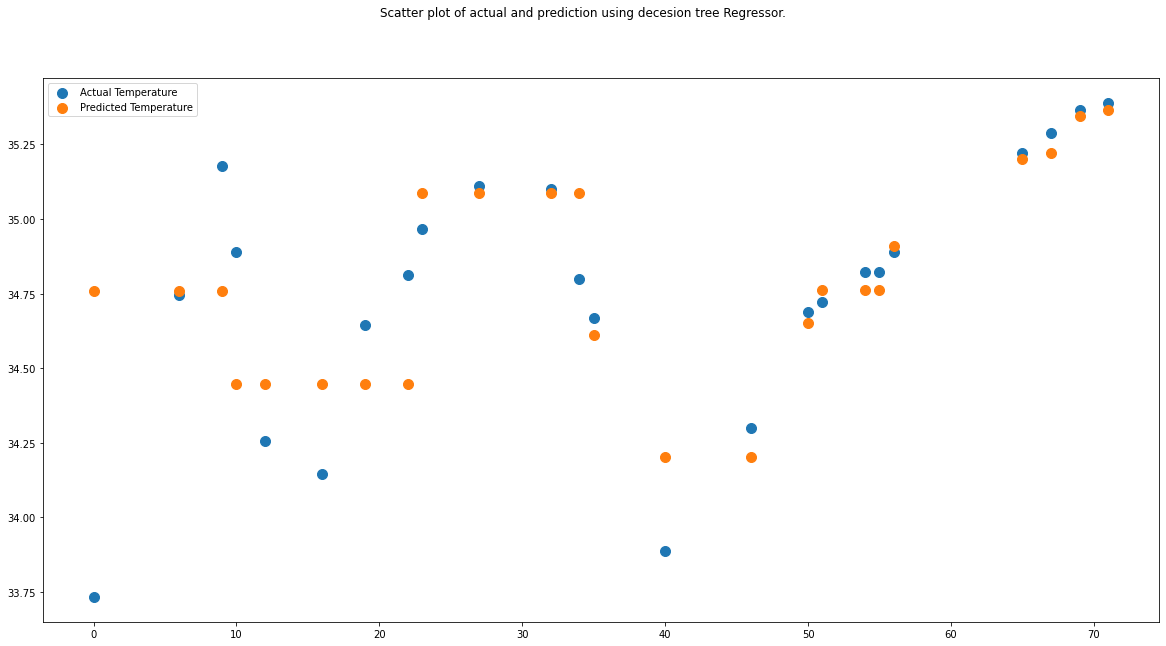

In [34]:
fig, axe = plt.subplots(figsize=(20,10))
fig.suptitle("Scatter plot of actual and prediction using decesion tree Regressor.")
axe.scatter(x=df_plot2.index.to_list(), y=df_plot2['y_test'], label='Actual Temperature', s = 100)
axe.scatter(x=df_plot2.index.to_list(), y=df_plot2['y_pred'], label='Predicted Temperature', s = 100)
axe.legend()
plt.show()

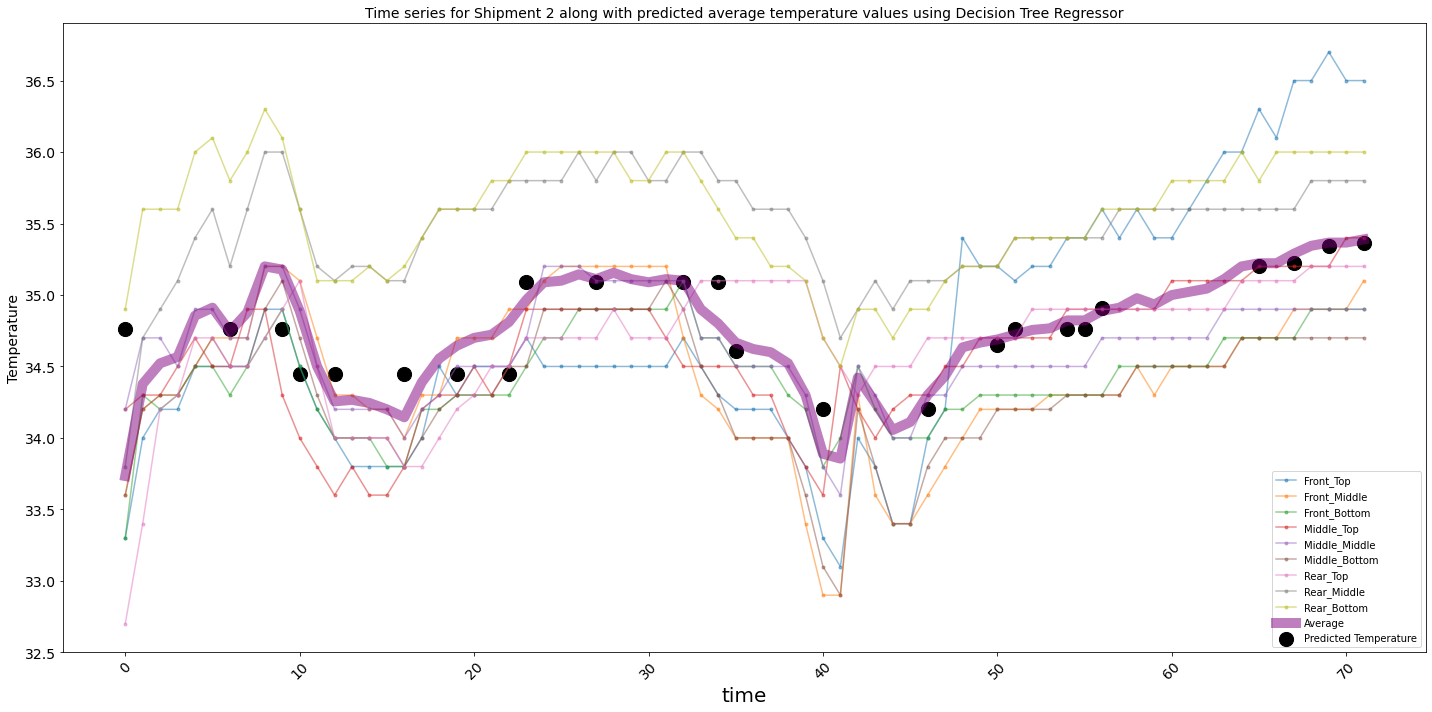

In [35]:
plt.figure(figsize=(20,10))
for index in columns_ship2:

  plt.plot(ship2.index, ship2[index], '.-', label= index, alpha=0.5)
plt.plot(ship2_average.index, ship2_average["Average"], label= "Average", alpha=0.5, color='purple', linewidth=10)
plt.scatter(x=df_plot2.index.to_list(), y=df_plot2['y_pred'], label='Predicted Temperature', s = 200, color = 'black')
plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 2 along with predicted average temperature values using Decision Tree Regressor', fontsize=14)
plt.legend()
plt.tight_layout()

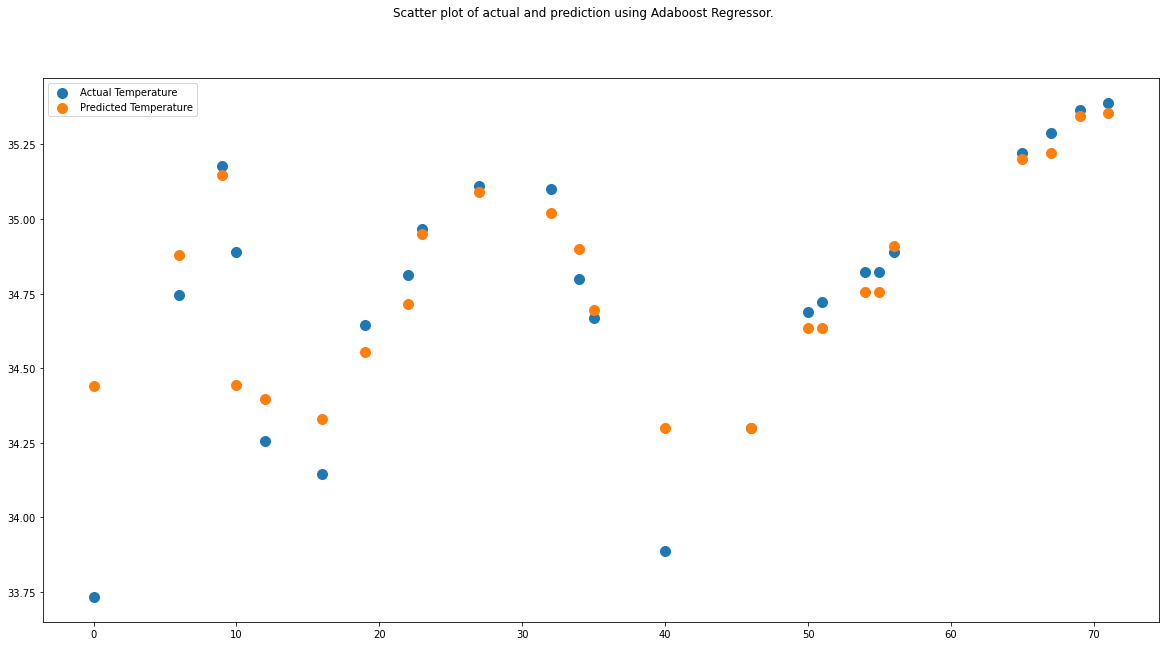

In [36]:
fig, axe = plt.subplots(figsize=(20,10))
fig.suptitle("Scatter plot of actual and prediction using Adaboost Regressor.")
axe.scatter(x=df_plot3.index.to_list(), y=df_plot3['y_test'], label='Actual Temperature', s = 100)
axe.scatter(x=df_plot3.index.to_list(), y=df_plot3['y_pred'], label='Predicted Temperature', s = 100)
axe.legend()
plt.show()

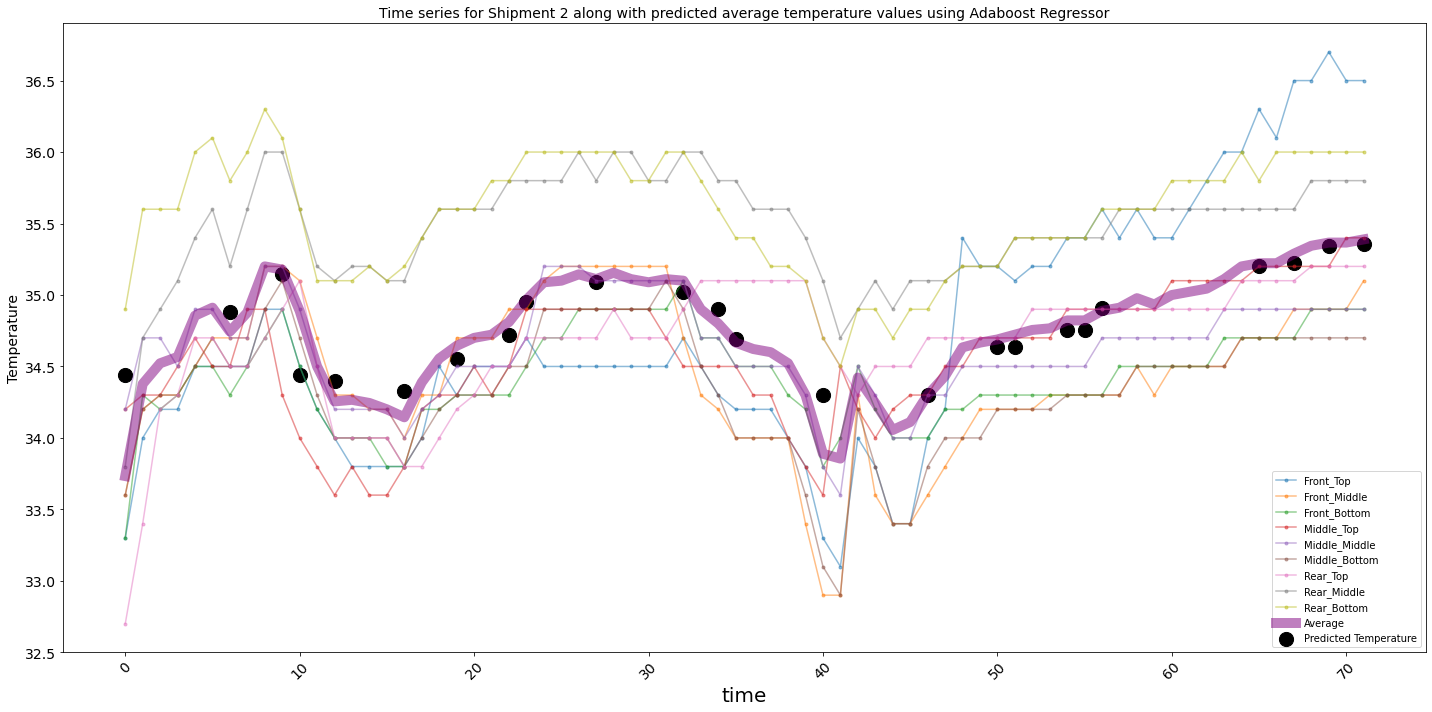

In [37]:
plt.figure(figsize=(20,10))
for index in columns_ship2:

  plt.plot(ship2.index, ship2[index], '.-', label= index, alpha=0.5)
plt.plot(ship2_average.index, ship2_average["Average"], label= "Average", alpha=0.5, color='purple', linewidth=10)
plt.scatter(x=df_plot3.index.to_list(), y=df_plot3['y_pred'], label='Predicted Temperature', s = 200, color = 'black')
plt.xlabel('time', fontsize=20)
plt.ylabel('Temperature', fontsize=14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Time series for Shipment 2 along with predicted average temperature values using Adaboost Regressor', fontsize=14)
plt.legend()
plt.tight_layout()